In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [5]:
#importing dataset to csv

data=pd.read_csv("C:/Users/chandrash/Downloads/Lead Scoring Assignment/Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
#checking rows and columns
data.shape

(9240, 37)

In [9]:
#data check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [12]:
#check for duplicates in prospect ID
sum(data.duplicated(subset = 'Prospect ID')) == 0

# no duplicates found in prospect ID 

True

In [13]:
#check for duplicates in Lead number
sum(data.duplicated(subset = 'Lead Number')) == 0

# no duplicates found in Lead number 

True

Exploratory Data Analysis 

DATA CLEANING 

In [14]:
#Prospect and Leadnumber are not repetitive and are unique hence they no relevance and can be dropped 

data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [17]:
#Converting 'Select' values to NaN.

data = data.replace('Select', np.nan)

In [18]:
#Checking Null values in rows. 

data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [19]:
#checking percentage of null values in each column

round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [20]:
#no relevance of parameters with missing values more than 45 percent.

cols=data.columns

for i in cols:
    if((100*(data[i].isnull().sum()/len(data.index))) >= 45):
        data.drop(i, 1, inplace = True)

In [21]:
#checking null values percentage

round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Treatment of categorical analysis . 

In [22]:
#checking value counts of Country column

data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

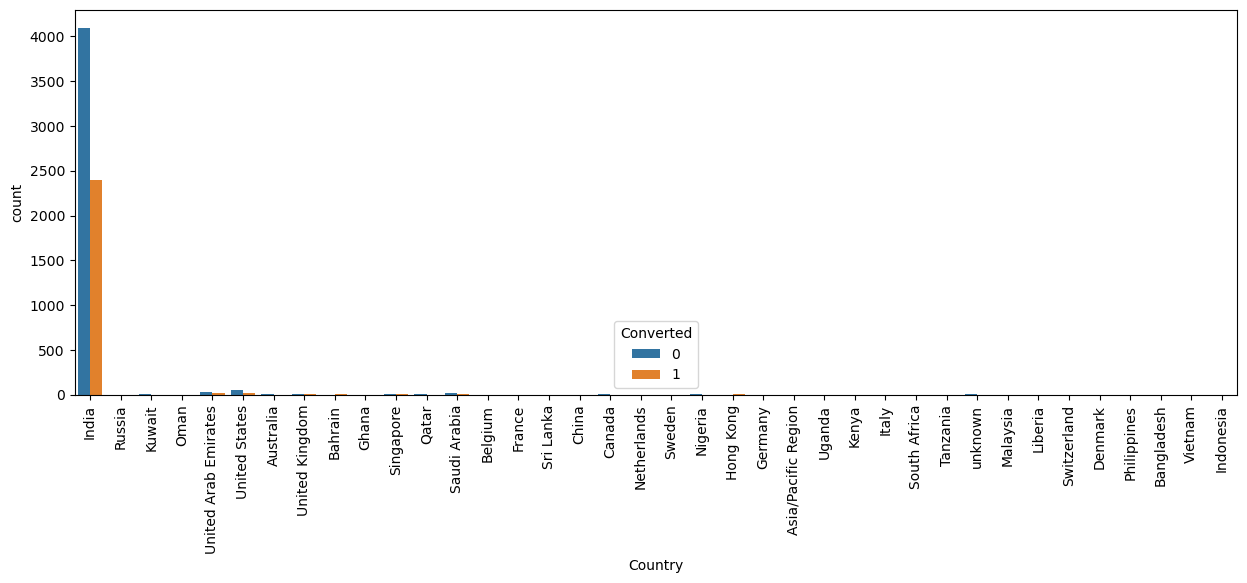

In [23]:
#plotting to analyse Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(data.Country, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [24]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

data['Country'] = data['Country'].replace(np.nan,'India')

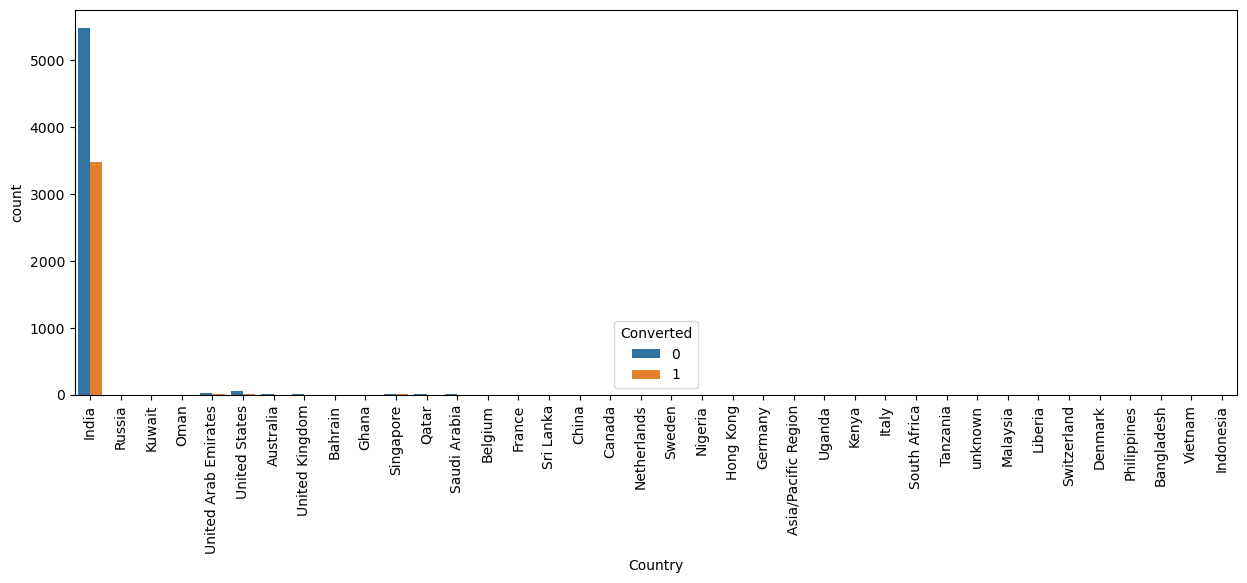

In [25]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(data.Country, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

India missing values and hence can be removed.

In [26]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [28]:
#value counts of city column

data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [29]:
data['City'] = data['City'].replace(np.nan,'Mumbai')

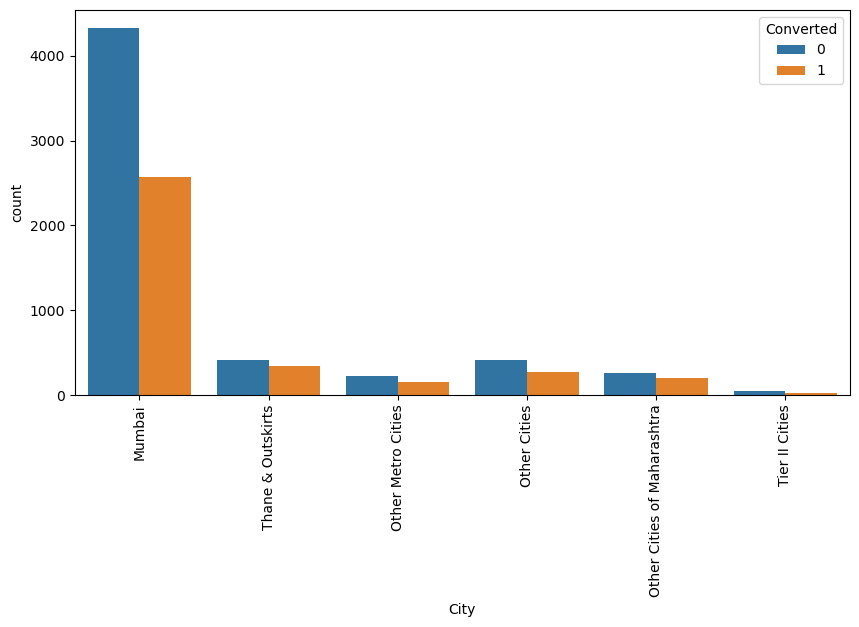

In [30]:
#plotting City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(data.City, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [32]:
#value counts of Specialization column

data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [33]:
#we will replace NaN values here with 'Not Specified'
data['Specialization'] = data['Specialization'].replace(np.nan, 'Not Specified')

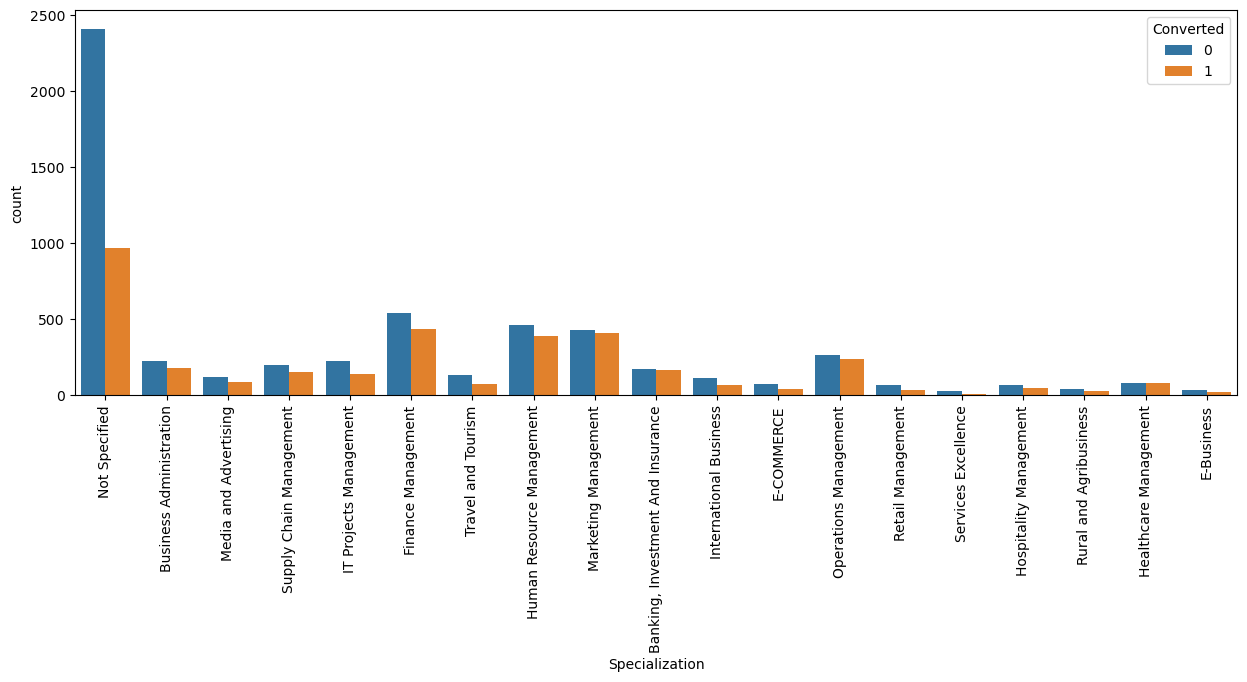

In [34]:
#plotting Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(data.Specialization, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


#specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [35]:
#combining Management Specializations because they show similar trends

data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

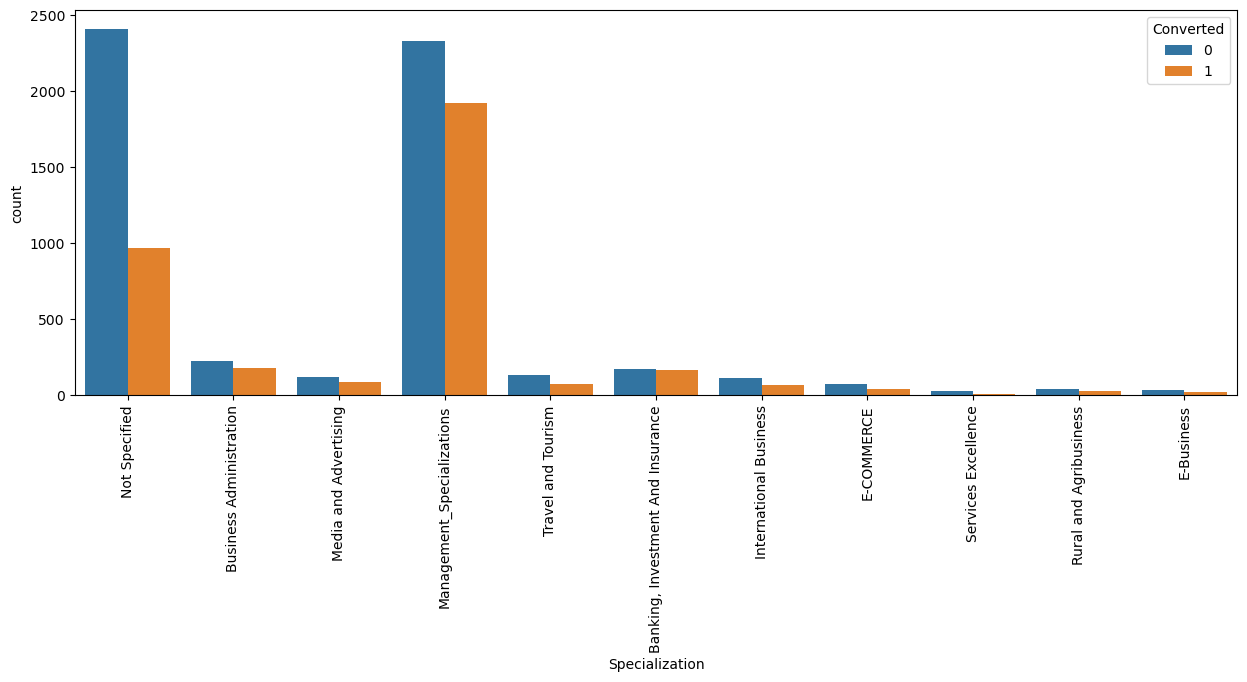

In [36]:
#visualizing count of Variable again after merging management specialization


plt.figure(figsize=(15,5))
s1=sns.countplot(data.Specialization, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [37]:
#current occupation

data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [38]:
#replacing Nan values with mode "Unemployed"

data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [40]:
#checking count of values again after replacement 
data['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

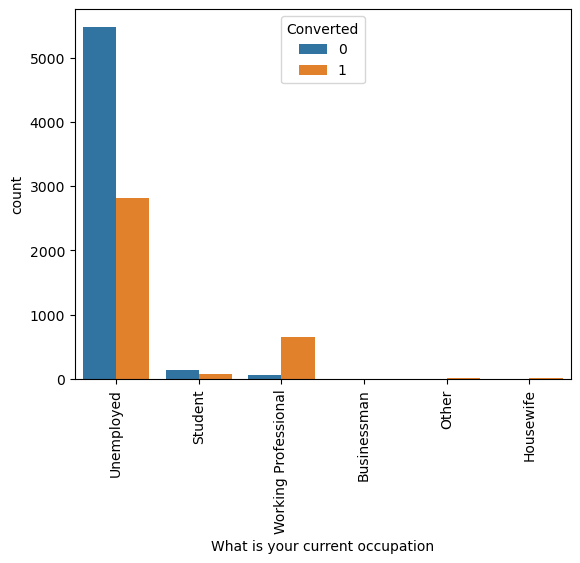

In [41]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(data['What is your current occupation'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#Working Professionals have high chances of joining it.
#Unemployed leads are the highest in number

In [42]:
#checking value counts

data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [44]:
#Merging Nan values with Mode "Better Career Prospects"

data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

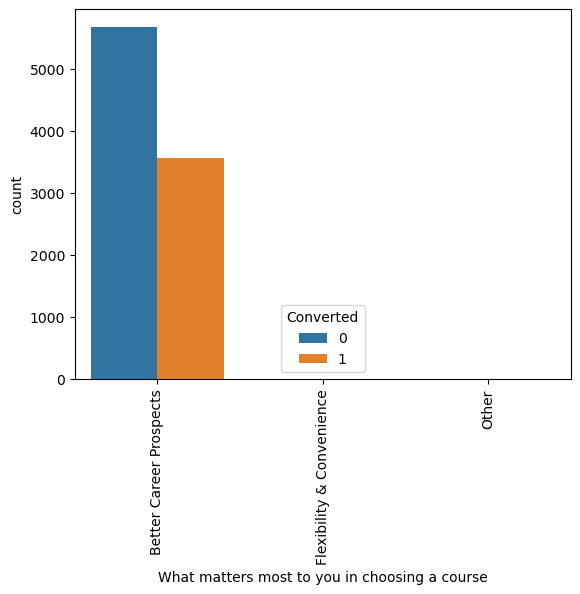

In [46]:
#visualizing count of Variable after the merger 

s1=sns.countplot(data['What matters most to you in choosing a course'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [47]:
#checking value counts of variable
data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [48]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [49]:
#checking value counts of Tag variable
data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [50]:
#replacing Nan values with "Not Specified"
data['Tags'] = data['Tags'].replace(np.nan,'Not Specified')

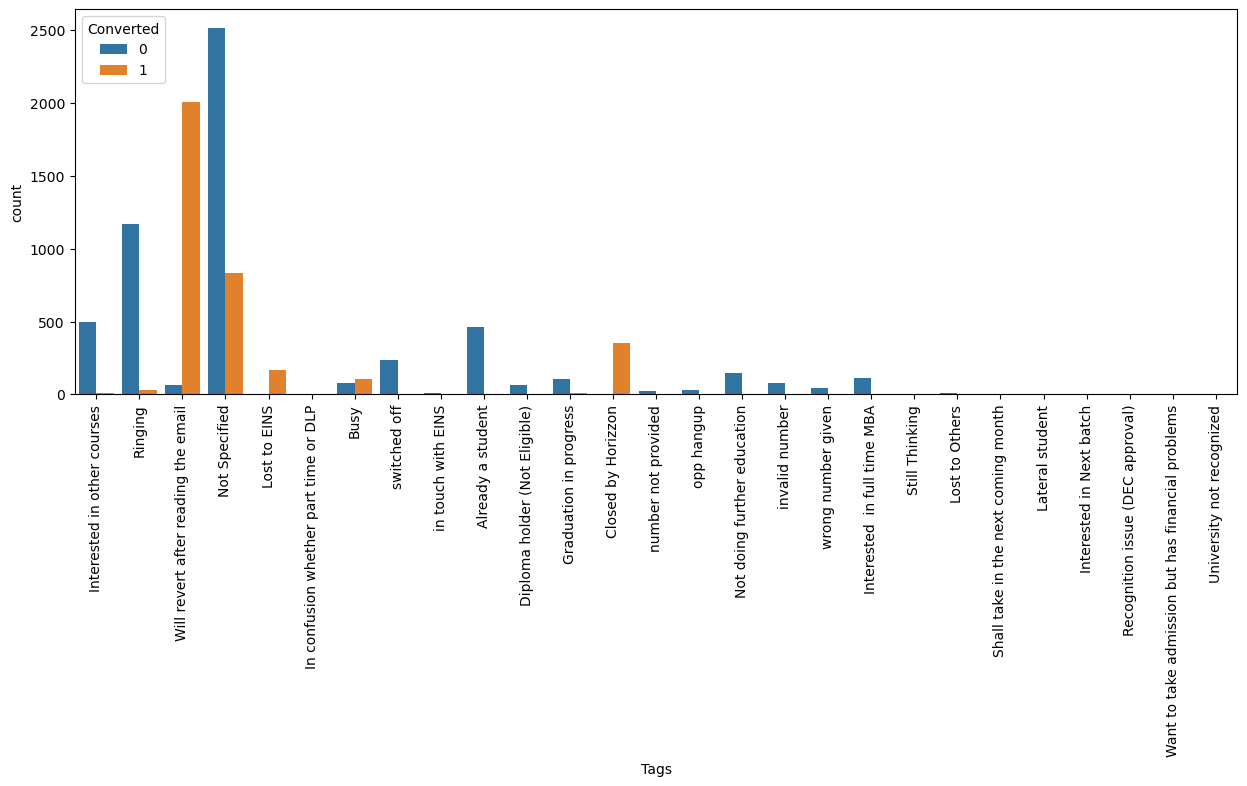

In [51]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(data['Tags'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [52]:
#replacing tags with low frequency with "Other Tags"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

data['Tags'] = data['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [55]:
#checking percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [57]:
#checking value counts of Lead Source column

data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [58]:
#replacing Nan Values and combining low frequency values
data['Lead Source'] = data['Lead Source'].replace(np.nan,'Others')
data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')
#We can group some of the lower frequency occuring labels under a common label 'Others'

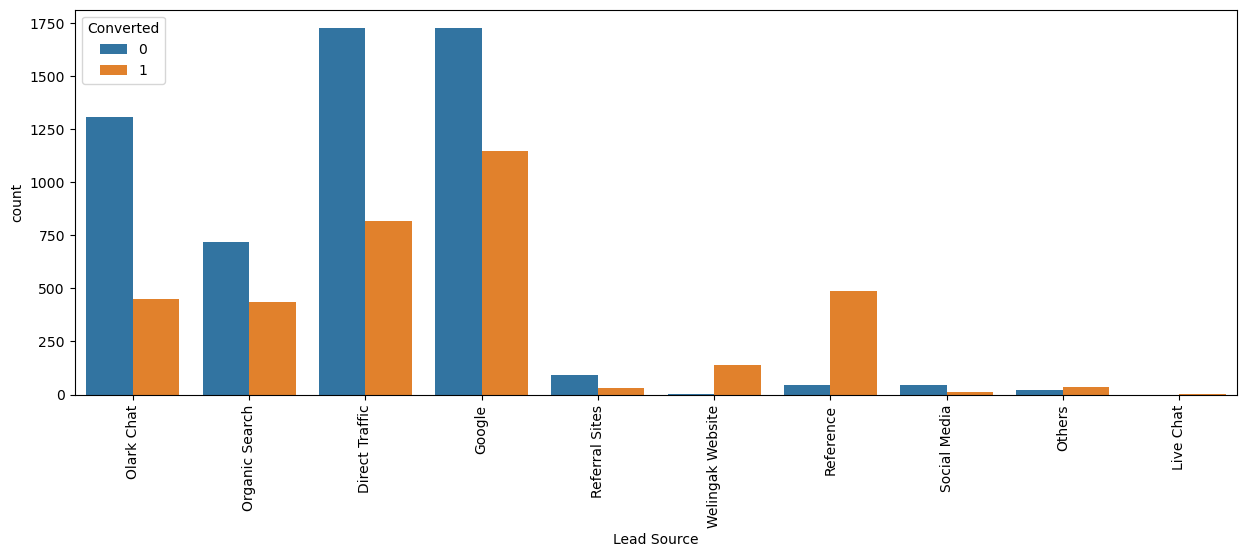

In [59]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(data['Lead Source'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#observation
#Maximum number of leads are from by Google and Direct traffic.
#Conversion Rate of reference leads and leads through welingak website is high.
#To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [60]:
# Last Activity:

data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [61]:
#replacing Nan Values and combining low frequency values

data['Last Activity'] = data['Last Activity'].replace(np.nan,'Others')
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [62]:
# Last Activity:

data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [63]:
#Check the Null Values in All Columns:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [ ]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
data = data.dropna()

In [64]:
#Checking percentage of Null Values in All Columns:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [65]:
#Lead Origin
data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

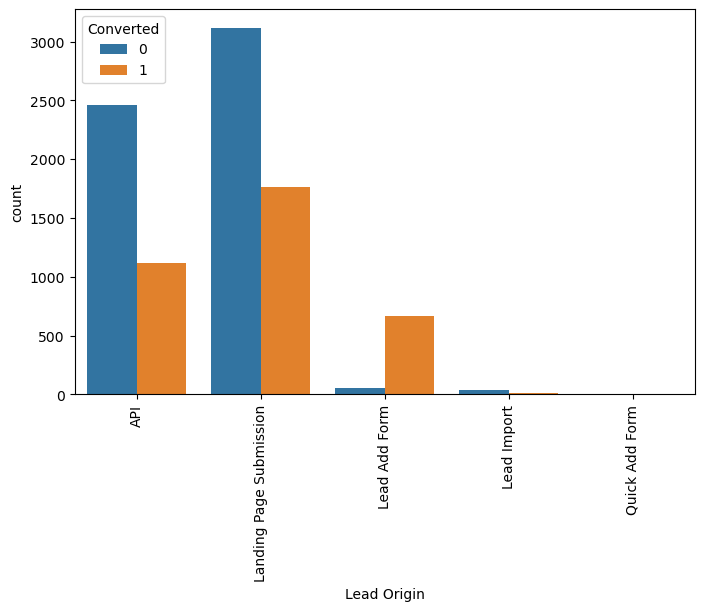

In [66]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(data['Lead Origin'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


#Inference
#API and Landing Page Submission bring higher number of leads as well as conversion.
#Lead Add Form has a very high conversion rate but count of leads are not very high.
#Lead Import and Quick Add Form get very few leads.
#In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

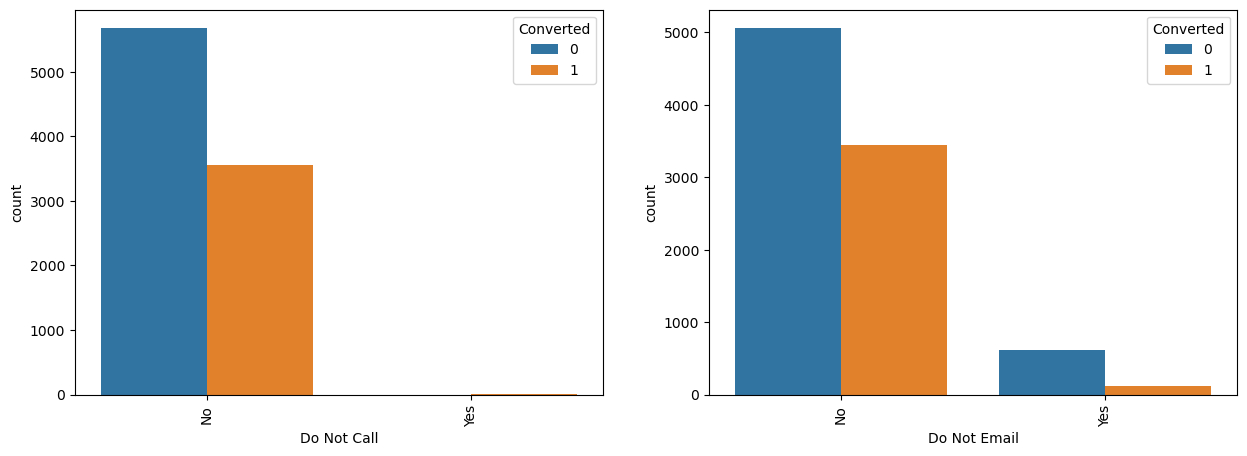

In [67]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(data['Do Not Call'], hue=data.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(data['Do Not Email'], hue=data.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [68]:
#checking value counts for Do Not Call
data['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [69]:
#checking value counts for Do Not Email
data['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

In [70]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [71]:
# IMBALANCED VARIABLES THAT CAN BE DROPPED

data.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [72]:
data.Magazine.value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [73]:
data['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [74]:
data['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [75]:
data['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [76]:
data['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [77]:
data['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [78]:
data['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [79]:
data['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [81]:
data['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [82]:
data['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [83]:
data['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [84]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [85]:
#checking value counts of last Notable Activity
data['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [ ]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

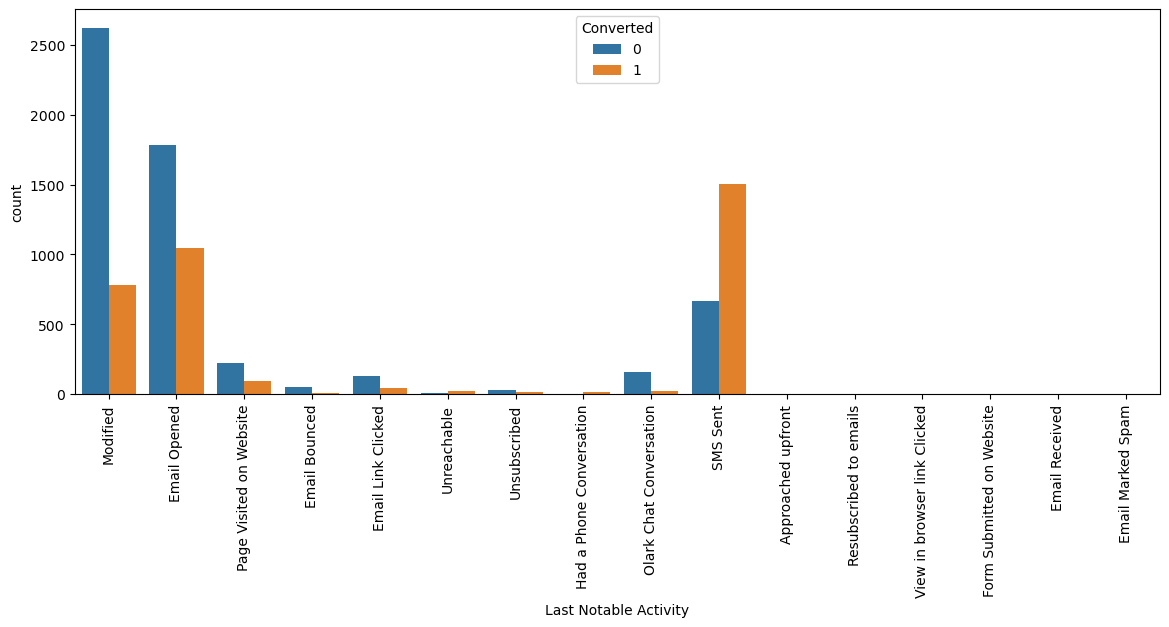

In [87]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [88]:
#checking value counts for variable

data['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [89]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [90]:
#dropping columns
data = data.drop(cols_to_drop,1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

Numerical Attributes Analysis:

In [91]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

38.53896103896104

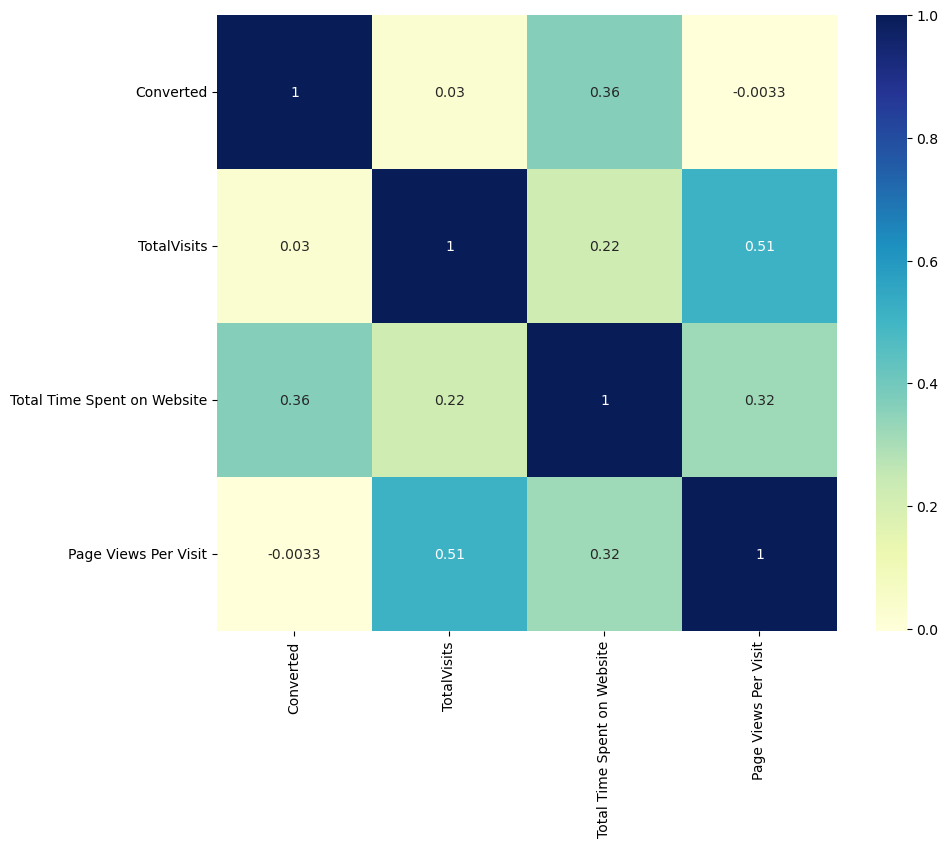

In [92]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

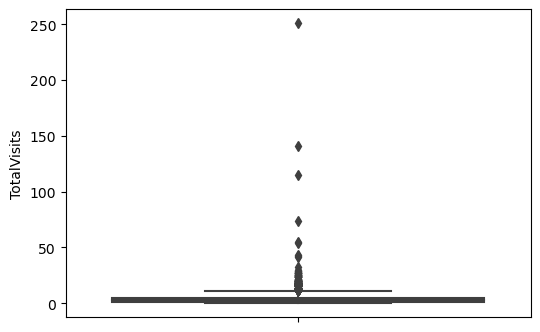

In [93]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=data['TotalVisits'])
plt.show()

In [94]:
#checking percentile values for "Total Visits"

data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

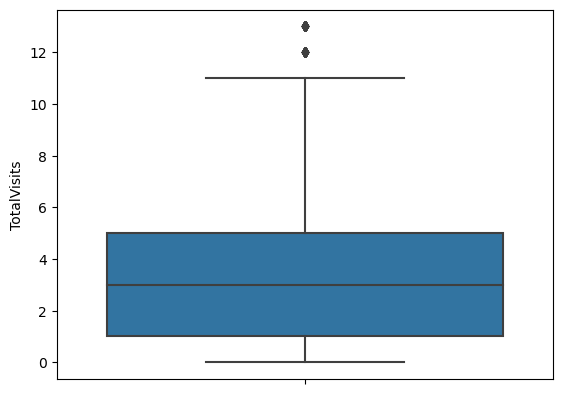

In [96]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = data.TotalVisits.quantile(0.99)
data = data[(data.TotalVisits <= Q3)]
Q1 = data.TotalVisits.quantile(0.01)
data = data[(data.TotalVisits >= Q1)]
sns.boxplot(y=data['TotalVisits'])
plt.show()

In [97]:
data.shape

(8929, 14)

In [98]:
#checking percentiles for "Total Time Spent on Website"

data['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8929.000000
mean      476.246612
std       543.335243
min         0.000000
5%          0.000000
25%         4.000000
50%       239.000000
75%       905.000000
90%      1368.000000
95%      1552.000000
99%      1836.440000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

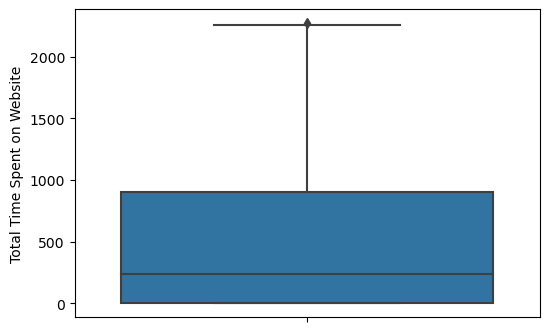

In [99]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=data['Total Time Spent on Website'])
plt.show()

#no outlier treatment required

In [100]:
#checking spread of "Page Views Per Visit"

data['Page Views Per Visit'].describe()

count    8929.000000
mean        2.303194
std         1.993860
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: Page Views Per Visit, dtype: float64

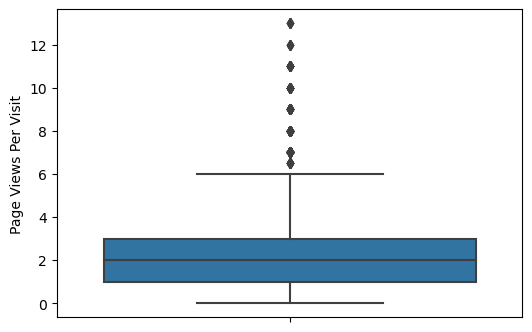

In [101]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()

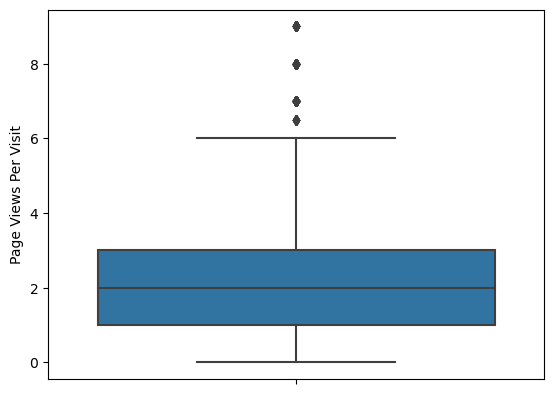

In [102]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = data['Page Views Per Visit'].quantile(0.99)
data = data[data['Page Views Per Visit'] <= Q3]
Q1 = data['Page Views Per Visit'].quantile(0.01)
data = data[data['Page Views Per Visit'] >= Q1]
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()

In [103]:
data.shape

(8878, 14)

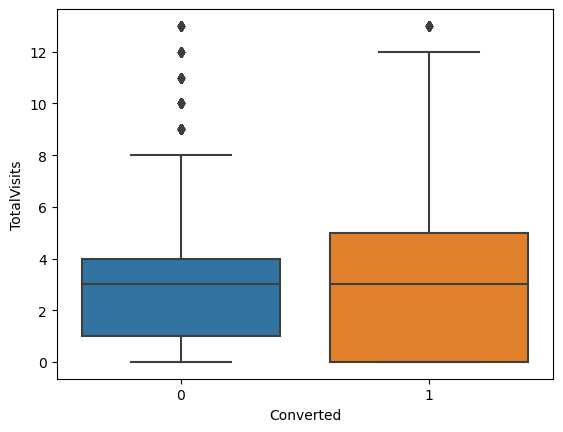

In [104]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)
plt.show()

#Inference

#Median for converted and not converted leads are the close.
#Nothng conclusive can be said on the basis of Total Visits

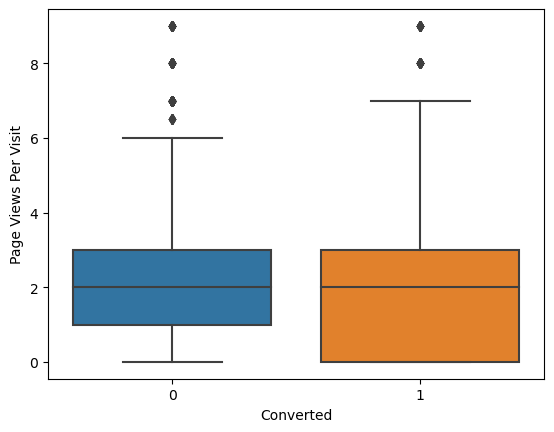

In [105]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=data.Converted,y=data['Page Views Per Visit'])
plt.show()

#Inference

#Median for converted and unconverted leads is the same.
#Nothing can be said specifically for lead conversion from Page Views Per Visi

In [106]:
#checking missing values in leftover columns/

round(100*(data.isnull().sum()/len(data.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

DUMMY VARIABLE CREATION

In [107]:
#getting a list of categorical columns

cat_cols= data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [108]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [109]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(data[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

data = pd.concat([data,dummy],1)

In [110]:
dummy = pd.get_dummies(data['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([data, dummy], axis = 1)

In [111]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [112]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [114]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [115]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [116]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [117]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [118]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [119]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 1233 to 5879
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6214 non-null   float64
 1   Total Time Spent on Website                           6214 non-null   int64  
 2   Page Views Per Visit                                  6214 non-null   float64
 3   Lead Origin_Landing Page Submission                   6214 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6214 non-null   uint8  
 5   Lead Origin_Lead Import                               6214 non-null   uint8  
 6   What is your current occupation_Housewife             6214 non-null   uint8  
 7   What is your current occupation_Other                 6214 non-null   uint8  
 8   What is your current occupation_Student               6

In [120]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1233,-1.130693,-0.871154,-1.193107,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6078,-1.130693,-0.871154,-1.193107,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6404,-0.010992,-0.743835,0.402109,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4409,-1.130693,-0.871154,-1.193107,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1927,-1.130693,-0.871154,-1.193107,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [138]:
import statsmodels.api as sm

In [140]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [141]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True])

In [143]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('What is your current occupation_Housewife', False, 7),
 ('What is your current occupation_Other', False, 26),
 ('What is your current occupation_Student', False, 3),
 ('What is your current occupation_Unemployed', False, 2),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 14),
 ('City_Other Cities of Maharashtra', False, 17),
 ('City_Other Metro Cities', False, 23),
 ('City_Thane & Outskirts', False, 21),
 ('City_Tier II Cities', False, 9),
 ('Specialization_Banking, Investment And Insurance', False, 16),
 ('Specialization_Business Administration', False, 22),
 ('Specialization_E-Business', False, 20),
 ('Specialization_E-COMMERCE', False, 18),
 ('Specialization_International Business', False, 6),

In [144]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [145]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Live Chat',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website'],
    

In [146]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

#p-value of variable Lead Source_Referral Sites is high, so we can drop it.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6214
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1256.0
Date:                Mon, 21 Nov 2022   Deviance:                       2512.0
Time:                        22:18:09   Pearson chi2:                 9.53e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3700      1.250     -1.096      0.273      -3.820       1.080
Total Time Spent on Website                              1.0725      0.060     17.738      0.000       0.954       1.191
Lead Origin_Landing Page Submission                     -0.8315      0.150     -5.559      0.000      -1.125      -0.538
Lead Origin_Lead Add Form                                1.4691      1.413      1.039      0.299      -1.301       4.239
What is your current occupation_Working Professional     0.6701      0.383      1.751      0.080      -0.080       1.420
Specialization_Travel and Tourism                       -0.5454      0.425     -1.283      0.199      -1.378       0.288
Lead Source_Direct Traffic                              -0.9123      1.251     -0.730      0.466      -3.363       1.539
Lead Source_Google                                      -0.8005      1.246     -0.642      0.521      -3.243       1.642
Lead Source_Olark Chat                                   0.1806      1.246      0.145      0.885      -2.261       2.622
Lead Source_Organic Search                              -0.7817      1.252     -0.624      0.532      -3.235       1.672
Lead Source_Reference                                   -0.9985      1.282     -0.779      0.436      -3.512       1.515
Lead Source_Referral Sites                              -0.8558      1.321     -0.648      0.517      -3.446       1.734
Lead Source_Social Media                                -1.0081      1.512     -0.667      0.505      -3.971       1.955
Lead Source_Welingak Website                            24.0733   1.76e+04      0.001      0.999   -3.45e+04    3.45e+04
Last Activity_Converted to Lead                         -0.6204      0.375     -1.652      0.098      -1.356       0.116
Last Activity_Email Bounced                             -0.6868      0.465     -1.476      0.140      -1.599       0.225
Last Activity_Email Opened                               0.7747      0.193      4.013      0.000       0.396       1.153
Last Activity_Olark Chat Conversation                   -0.8647      0.274     -3.154      0.002      -1.402      -0.327
Last Activity_SMS Sent                                   2.4943      0.198     12.601      0.000       2.106       2.882
Tags_Busy                                                0.9855      0.230      4.288      0.000       0.535       1.436
Tags_Closed by Horizzon                                  6.7232      1.024      6.568      0.000       4.717       8.730
Tags_Interested in other courses                        -2.1891      0.401     -5.462      0.000      -2.975      -1.404
Tags_Lost to EINS                                        5

In [147]:
#dropping column with high p-value

col = col.drop('Lead Source_Referral Sites',1)

In [148]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

#Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6214
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1256.2
Date:                Mon, 21 Nov 2022   Deviance:                       2512.4
Time:                        22:18:23   Pearson chi2:                 9.52e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1401      0.448     -4.780      0.000      -3.018      -1.263
Total Time Spent on Website                              1.0719      0.060     17.732      0.000       0.953       1.190
Lead Origin_Landing Page Submission                     -0.8291      0.150     -5.544      0.000      -1.122      -0.536
Lead Origin_Lead Add Form                                2.0129      1.137      1.771      0.077      -0.215       4.241
What is your current occupation_Working Professional     0.6698      0.383      1.750      0.080      -0.080       1.420
Specialization_Travel and Tourism                       -0.5468      0.425     -1.287      0.198      -1.380       0.286
Lead Source_Direct Traffic                              -0.1437      0.454     -0.317      0.752      -1.033       0.746
Lead Source_Google                                      -0.0307      0.436     -0.070      0.944      -0.886       0.824
Lead Source_Olark Chat                                   0.9496      0.438      2.169      0.030       0.092       1.808
Lead Source_Organic Search                              -0.0119      0.452     -0.026      0.979      -0.898       0.874
Lead Source_Reference                                   -0.7722      1.192     -0.648      0.517      -3.108       1.563
Lead Source_Social Media                                -0.2382      0.959     -0.248      0.804      -2.118       1.642
Lead Source_Welingak Website                            24.2995   1.76e+04      0.001      0.999   -3.45e+04    3.45e+04
Last Activity_Converted to Lead                         -0.6185      0.376     -1.646      0.100      -1.355       0.118
Last Activity_Email Bounced                             -0.6872      0.465     -1.477      0.140      -1.599       0.225
Last Activity_Email Opened                               0.7736      0.193      4.007      0.000       0.395       1.152
Last Activity_Olark Chat Conversation                   -0.8655      0.274     -3.156      0.002      -1.403      -0.328
Last Activity_SMS Sent                                   2.4944      0.198     12.602      0.000       2.106       2.882
Tags_Busy                                                0.9841      0.230      4.283      0.000       0.534       1.434
Tags_Closed by Horizzon                                  6.7228      1.024      6.567      0.000       4.716       8.729
Tags_Interested in other courses                        -2.1963      0.401     -5.475      0.000      -2.982      -1.410
Tags_Lost to EINS                                        5.5603      0.615      9.042      0.000       4.355       6.766
Tags_Other_Tags                                         -2

In [149]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [150]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#There is a high correlation between two variables so we drop the variable with the higher valued VIF value

,Features,VIF
2,Lead Origin_Lead Add Form,18.07
9,Lead Source_Reference,13.85
5,Lead Source_Direct Traffic,5.46
1,Lead Origin_Landing Page Submission,4.62
11,Lead Source_Welingak Website,4.61
6,Lead Source_Google,4.43
14,Last Activity_Email Opened,3.87
16,Last Activity_SMS Sent,3.60
7,Lead Source_Olark Chat,2.98
8,Lead Source_Organic Search,2.38


In [152]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6214
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1256.2
Date:                Mon, 21 Nov 2022   Deviance:                       2512.4
Time:                        22:18:53   Pearson chi2:                 9.52e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1401      0.448     -4.780      0.000      -3.018      -1.263
Total Time Spent on Website                              1.0719      0.060     17.732      0.000       0.953       1.190
Lead Origin_Landing Page Submission                     -0.8291      0.150     -5.544      0.000      -1.122      -0.536
Lead Origin_Lead Add Form                                2.0129      1.137      1.771      0.077      -0.215       4.241
What is your current occupation_Working Professional     0.6698      0.383      1.750      0.080      -0.080       1.420
Specialization_Travel and Tourism                       -0.5468      0.425     -1.287      0.198      -1.380       0.286
Lead Source_Direct Traffic                              -0.1437      0.454     -0.317      0.752      -1.033       0.746
Lead Source_Google                                      -0.0307      0.436     -0.070      0.944      -0.886       0.824
Lead Source_Olark Chat                                   0.9496      0.438      2.169      0.030       0.092       1.808
Lead Source_Organic Search                              -0.0119      0.452     -0.026      0.979      -0.898       0.874
Lead Source_Reference                                   -0.7722      1.192     -0.648      0.517      -3.108       1.563
Lead Source_Social Media                                -0.2382      0.959     -0.248      0.804      -2.118       1.642
Lead Source_Welingak Website                            24.2995   1.76e+04      0.001      0.999   -3.45e+04    3.45e+04
Last Activity_Converted to Lead                         -0.6185      0.376     -1.646      0.100      -1.355       0.118
Last Activity_Email Bounced                             -0.6872      0.465     -1.477      0.140      -1.599       0.225
Last Activity_Email Opened                               0.7736      0.193      4.007      0.000       0.395       1.152
Last Activity_Olark Chat Conversation                   -0.8655      0.274     -3.156      0.002      -1.403      -0.328
Last Activity_SMS Sent                                   2.4944      0.198     12.602      0.000       2.106       2.882
Tags_Busy                                                0.9841      0.230      4.283      0.000       0.534       1.434
Tags_Closed by Horizzon                                  6.7228      1.024      6.567      0.000       4.716       8.729
Tags_Interested in other courses                        -2.1963      0.401     -5.475      0.000      -2.982      -1.410
Tags_Lost to EINS                                        5.5603      0.615      9.042      0.000       4.355       6.766
Tags_Other_Tags                                         -2

In [153]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

,Features,VIF
2,Lead Origin_Lead Add Form,18.07
9,Lead Source_Reference,13.85
5,Lead Source_Direct Traffic,5.46
1,Lead Origin_Landing Page Submission,4.62
11,Lead Source_Welingak Website,4.61
6,Lead Source_Google,4.43
14,Last Activity_Email Opened,3.87
16,Last Activity_SMS Sent,3.60
7,Lead Source_Olark Chat,2.98
8,Lead Source_Organic Search,2.38


In [154]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1233    0.056705
6078    0.205752
6404    0.024072
4409    0.034703
1927    0.996639
1969    0.591488
7413    0.147356
7097    0.004534
327     0.985501
6215    0.233147
dtype: float64

In [155]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
1233,0,0.056705,1233
6078,0,0.205752,6078
6404,0,0.024072,6404
4409,0,0.034703,4409
1927,1,0.996639,1927


In [156]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
1233,0,0.056705,1233,0
6078,0,0.205752,6078,0
6404,0,0.024072,6404,0
4409,0,0.034703,4409,0
1927,1,0.996639,1927,1


In [157]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3699  173]
 [ 297 2045]]


In [158]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.92436433859028


In [159]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [160]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8731853116994022

In [161]:
# Let us calculate specificity
TN / float(TN+FP)

0.9553202479338843

In [162]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.0446797520661157


In [163]:
# positive predictive value 
print (TP / float(TP+FP))

0.9220018034265104


In [164]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9256756756756757


In [166]:
#ROC CURVE

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [167]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

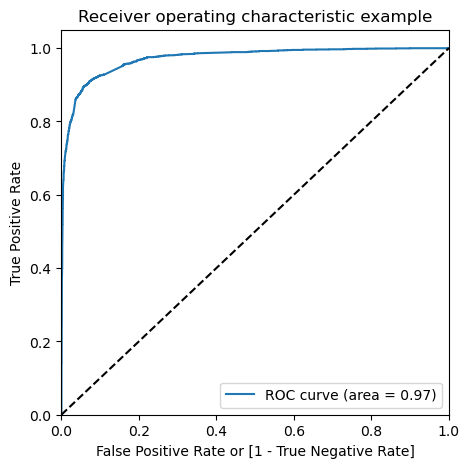

In [168]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

In [169]:
#Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1233,0,0.056705,1233,0,1,0,0,0,0,0,0,0,0,0
6078,0,0.205752,6078,0,1,1,1,0,0,0,0,0,0,0
6404,0,0.024072,6404,0,1,0,0,0,0,0,0,0,0,0
4409,0,0.034703,4409,0,1,0,0,0,0,0,0,0,0,0
1927,1,0.996639,1927,1,1,1,1,1,1,1,1,1,1,1


In [170]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376891  1.000000  0.000000
0.1   0.1  0.840682  0.975662  0.759039
0.2   0.2  0.883167  0.954313  0.840134
0.3   0.3  0.918249  0.912895  0.921488
0.4   0.4  0.924203  0.893254  0.942924
0.5   0.5  0.924364  0.873185  0.955320
0.6   0.6  0.912939  0.818958  0.969783
0.7   0.7  0.908272  0.792485  0.978306
0.8   0.8  0.900225  0.763023  0.983213
0.9   0.9  0.882845  0.704526  0.990702


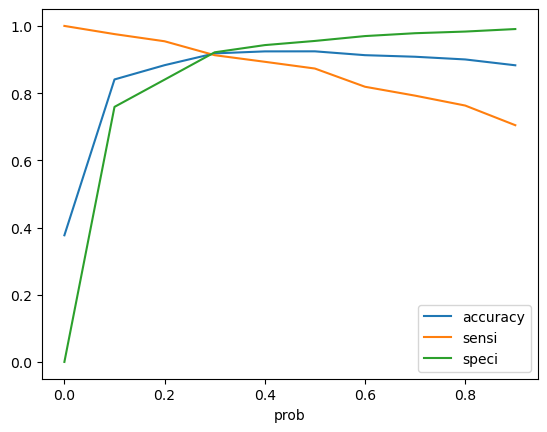

In [171]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [172]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
1233,0,0.056705,1233,0,1,0,0,0,0,0,0,0,0,0,0
6078,0,0.205752,6078,0,1,1,1,0,0,0,0,0,0,0,0
6404,0,0.024072,6404,0,1,0,0,0,0,0,0,0,0,0,0
4409,0,0.034703,4409,0,1,0,0,0,0,0,0,0,0,0,0
1927,1,0.996639,1927,1,1,1,1,1,1,1,1,1,1,1,1


In [173]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
1233,0,0.056705,1233,0,6
6078,0,0.205752,6078,0,21
6404,0,0.024072,6404,0,2
4409,0,0.034703,4409,0,3
1927,1,0.996639,1927,1,100


In [216]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9182491149018346

In [174]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3568,  304],
       [ 204, 2138]], dtype=int64)

In [175]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [176]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9128949615713066

In [177]:
# Let us calculate specificity
TN / float(TN+FP)

0.9214876033057852

Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

Accuracy : 91.82%
Sensitivity : 91.29%
Specificity : 92.15%
Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall

In [178]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07851239669421488


In [179]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8755118755118755


In [180]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9459172852598091


In [181]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3568,  304],
       [ 204, 2138]], dtype=int64)

In [182]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8755118755118755

In [183]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9128949615713066

In [184]:
from sklearn.metrics import precision_score, recall_score

In [185]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8755118755118755

In [186]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9128949615713066

In [187]:
from sklearn.metrics import precision_recall_curve

In [188]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

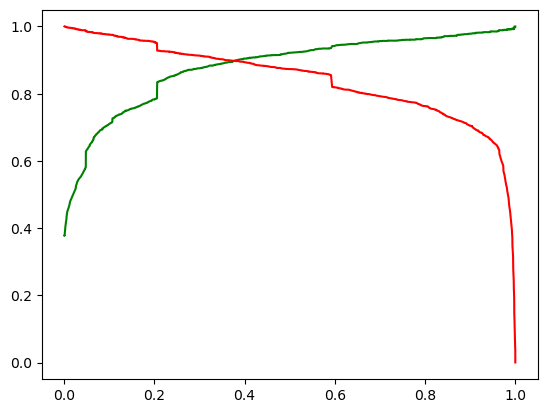

In [189]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [190]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1103,0.713461,1.713072,1.424441,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3775,-1.130765,-0.881876,-1.192363,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3228,0.344615,1.528111,0.901080,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5575,-1.130765,-0.881876,-1.192363,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3871,-1.130765,-0.881876,-1.192363,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [191]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,...,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1103,1.713072,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3775,-0.881876,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3228,1.528111,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5575,-0.881876,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3871,-0.881876,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [192]:
X_test_sm = sm.add_constant(X_test)

PREDICTIONS ON TEST SET

In [193]:
y_test_pred = res.predict(X_test_sm)

In [194]:
y_test_pred[:10]

1103    0.997485
3775    0.005500
3228    0.756299
5575    0.033647
3871    0.203880
948     0.978949
8836    0.215708
8512    0.005500
8548    0.025604
2126    0.996501
dtype: float64

In [195]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [196]:
# Let's see the head
y_pred_1.head()

,0
1103,0.997485
3775,0.005500
3228,0.756299
5575,0.033647
3871,0.203880


In [197]:
y_test_df = pd.DataFrame(y_test)

In [198]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [199]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [201]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [202]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,1103,0.997485
1,0,3775,0.005500
2,0,3228,0.756299
3,0,5575,0.033647
4,0,3871,0.203880


In [203]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [204]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,1103,0.997485
1,0,3775,0.005500
2,0,3228,0.756299
3,0,5575,0.033647
4,0,3871,0.203880


In [205]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [206]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,1103,1,0.997485,100
1,3775,0,0.005500,1
2,3228,0,0.756299,76
3,5575,0,0.033647,3
4,3871,0,0.203880,20


In [207]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [208]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,1103,1,0.997485,100,1
1,3775,0,0.005500,1,0
2,3228,0,0.756299,76,1
3,5575,0,0.033647,3,0
4,3871,0,0.203880,20,0


In [209]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9253003003003003

In [210]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1529,  115],
       [  84,  936]], dtype=int64)

In [211]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [212]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9176470588235294

In [213]:
# Let us calculate specificity
TN / float(TN+FP)

0.9300486618004866

In [214]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.89058039961941

In [215]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9176470588235294

Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 92.53%
Sensitivity : 91.76%
Specificity : 93.00%

Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 
Accuracy : 91.82%
Sensitivity : 91.29%
Specificity : 92.15%
Test Data: 
Accuracy : 92.59%
Sensitivity : 91.76%
Specificity : 93.00%
The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model